In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [27]:
data= pd.read_csv("Data.csv", sep=';')
data.sample(frac=1, random_state=42).reset_index(drop=True)

,Id,City,Area,Street,HouseNumber,Price,Size,Rooms,Floor,NumberOfFloors,Year,Type,Heating,Furnishings,Link,UploadDate,ViewedBy,RememberedBy,ScrapeDate,Class
0,32FB6297-FFEB-40FE-AAE4-C8FDC948D95B,Kaunas,Dainava,Taikos pr.,57,107980,"54,26",2,2,5,2021,Mūrinis,Centrinis kolektorinis,Dalinė apdaila,https://www.aruodas.lt/butai-kaune-dainavoje-t...,2022-02-14 00:00:00.0000000,88,1,2022-02-16 22:26:25.0526860,butas
1,8CC83B44-7349-4011-BB03-C5CFB1AFA90B,Kaunas,Aleksotas,K. Dulksnio g.,67,95340,"68,1",4,2,3,2021,Mūrinis,Aeroterminis,Dalinė apdaila,https://www.aruodas.lt/butai-kaune-aleksote-k-...,2021-12-30 00:00:00.0000000,1545,32,2022-02-17 07:26:39.3028630,butas
2,956F08F7-521B-4796-AB73-B73689FCD515,Kaunas,Žaliakalnis,Molėtų g.,8,37000,34,2,2,2,1929,Medinis,Dujinis,Įrengtas,https://www.aruodas.lt/butai-kaune-zaliakalnyj...,2022-01-04 00:00:00.0000000,3981,27,2022-02-17 07:24:02.9091110,butas
3,E22E58FA-5B17-4737-9ADD-D91E0DC8838F,Kaunas,Vilijampolė,Panerių g.,51,45000,68,2,2,4,1987,Mūrinis,Centrinis kolektorinis,Neįrengtas,https://www.aruodas.lt/butai-kaune-vilijampole...,2020-08-02 00:00:00.0000000,2223,3,2022-02-17 08:08:54.0601960,butas
4,CE426E97-C919-451C-9E3C-A6307A7E79A5,Kaunas,Vilijampolė,Neries krant.,53,74800,"43,91",2,2,12,1967,Mūrinis,Centrinis,Įrengtas,https://www.aruodas.lt/butai-kaune-vilijampole...,2022-02-14 00:00:00.0000000,223,2,2022-02-16 22:25:59.8992040,butas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,748851D4-82E4-4B65-958D-17177735947F,Kaunas,Lampėdžiai,Batniavos g.,17,308752,132,5,3,3,2022,Mūrinis,Dujinis,Dalinė apdaila,https://www.aruodas.lt/butai-kaune-lampedziuos...,2022-02-08 00:00:00.0000000,294,9,2022-02-16 22:45:39.8382270,butas
775,0E6BC5A1-EADA-4DC4-8059-22B4A2DA61D9,Kaunas,Dainava,Taikos pr.,14D,62000,"47,28",2,5,5,1970,Blokinis,Centrinis,Įrengtas,https://www.aruodas.lt/butai-kaune-dainavoje-t...,2022-02-07 00:00:00.0000000,547,7,2022-02-16 22:47:58.8779920,butas
776,CF85CD54-3692-4708-A4FF-576AB6CE7F14,Kaunas,Vilijampolė,Brastos g.,22G,178000,"50,2",2,4,4,2018,Mūrinis,Centrinis kolektorinis,Įrengtas,https://www.aruodas.lt/butai-kaune-vilijampole...,2021-06-07 00:00:00.0000000,9682,26,2022-02-17 08:07:11.4933470,butas
777,FCF7C50F-2909-4C1E-A760-9106645FEB6F,Kaunas,Šilainiai,A. Šapokos g.,14A,88000,"48,29",2,2,3,2021,Mūrinis,Dujinis,Įrengtas,https://www.aruodas.lt/butai-kaune-silainiuose...,2022-01-07 00:00:00.0000000,3273,52,2022-02-17 07:22:18.6857160,butas


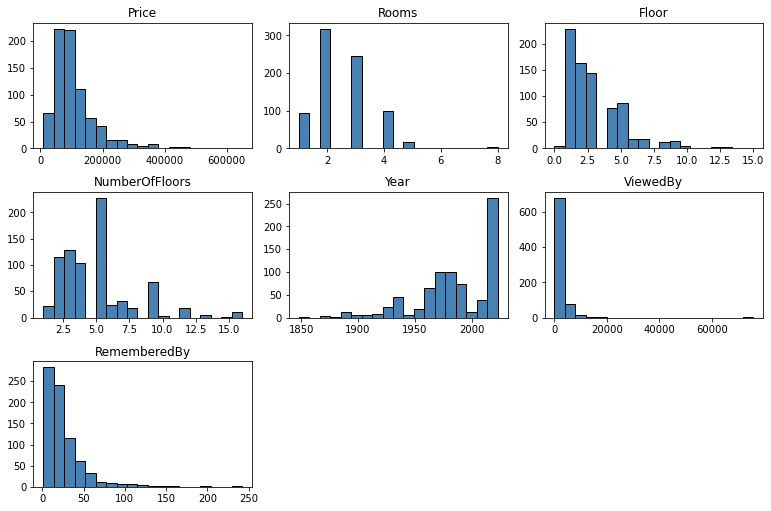

In [28]:
data.hist(bins=19, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 1.8, 1.8))  

Text(0.5, 0, 'Floor')

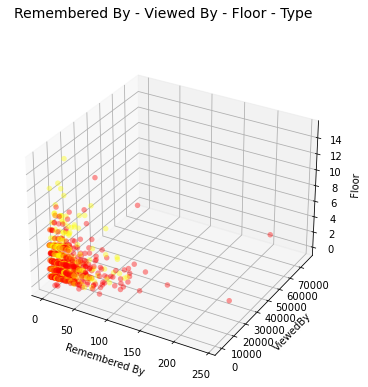

In [33]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Remembered By - Viewed By - Floor - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(data['RememberedBy'])
ys = list(data['ViewedBy'])
zs = list(data['Floor'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'Mūrinis' else 'yellow' for wt in list(data['Type'])]

for data1, color in zip(data_points, colors):
    x, y, z = data1
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Remembered By')
ax.set_ylabel('ViewedBy')
ax.set_zlabel('Floor')